<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузите-данные-и-подготовьте-их-к-анализу" data-toc-modified-id="Загрузите-данные-и-подготовьте-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузите данные и подготовьте их к анализу</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Задайте-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Задайте-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span><ul class="toc-item"><li><span><a href="#Функции-для-дальнейших-расчетов" data-toc-modified-id="Функции-для-дальнейших-расчетов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Функции для дальнейших расчетов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Профили-пользователей" data-toc-modified-id="Профили-пользователей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Профили пользователей</a></span></li><li><span><a href="#Доля-платящих-пользователей" data-toc-modified-id="Доля-платящих-пользователей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Доля платящих пользователей</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Расходы" data-toc-modified-id="Расходы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расходы</a></span></li></ul></li><li><span><a href="#Оцените-окупаемость-рекламы" data-toc-modified-id="Оцените-окупаемость-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оцените окупаемость рекламы</a></span><ul class="toc-item"><li><span><a href="#Анализ-окупаемости-рекламы" data-toc-modified-id="Анализ-окупаемости-рекламы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ окупаемости рекламы</a></span></li></ul></li><li><span><a href="#Напишите-выводы" data-toc-modified-id="Напишите-выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Напишите выводы</a></span></li></ul></div>

# План работы

1. Изучение данных
2. Предобработка данных
3. Подготвка функций
4. Составление профиля пользователей
5. Оценка расходов рекламных кампаний
6. Оценка окупаемости рекламы
7. Вывод

## Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

### Изучение данных

In [1]:
# Предварительно загрузим библиотеки, которые понадобятся нам для работы
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# Сохраним нужные нам файлы в соответствующих переменных
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
# Ознакомимся с каждым датасетом поочередно
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В данном разделе мы загрузили необходимые нам библиотеки. Также закрузили файлы, с которыми нам предстоит работать, и сохранили их в переменные `visits`, `orders` и `costs`. Для проверки корректности загрузки и ознокомления с данными, вывели на экран первые 5 строк датафрема и информацию о нем.

### Предобработка данных

Перед началом анализа, подготовим наши данные к работе. В первую очередь приведем названия столбцов к нижнему регистру и при необходимости переименуем.

In [9]:
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns={'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [10]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [11]:
costs.columns = costs.columns.str.lower()
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

Далее еще раз изучим основную информацию о датафреймах. Приведем столбцы к нужному нам типу данных и изучим на наличие пропусков.

In [12]:
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [13]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [14]:
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [15]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [16]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [17]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Во всех датафреймах столбцы приведены в нужный нам тип данных. Пропуски отсутствуют.

Далее изучим данные на наличие явных и неявных дубликатов. А также дубликаты, которые могут находиться в паре.

In [18]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

In [19]:
# Проверим дубликаты, которые могут находиться в паре, например, id пользователя и начало сессии.
visits[visits.duplicated(subset=['user_id', 'session_start'])]

,user_id,region,device,channel,session_start,session_end


In [20]:
orders[orders.duplicated(subset=['user_id', 'event_dt'])]

,user_id,event_dt,revenue


In [21]:
# Проверим наличие дубликатов в названиях стран, устройствах и канале.
display(visits['region'].unique())
display(visits['channel'].unique())
display(visits['device'].unique())

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

В столбце с названиями стран 3 страны записано полностью, а другая сокращена. Для удобства работы с данным столбцом в дальнейшем, приведем все столбцы к коротким обозначениям:
- United States - US
- United Kingdom - UK
- France - FR
- Germany - DE

In [22]:
# Зафиксируем
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [23]:
# Заменим названия и провери их количество
visits.loc[visits['region'] == 'United States', 'region'] = 'US'
visits.loc[visits['region'] == 'France', 'region'] = 'FR'
visits.loc[visits['region'] == 'Germany', 'region'] = 'DE'
visits['region'].value_counts()

US    207327
UK     36419
FR     35396
DE     30759
Name: region, dtype: int64

В данном разделе мы изучили датафреймы, с которыми нам предстоит работать. Привели "в порядок" названия столбцов, изменили тип данных столбца там, где это было необходимо для дальнейшей работы. Проверили данные на наличие явных и неявных дубликатов, а также пропусков. 

## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

###  Функции для дальнейших расчетов


Как выше прописано в задании, в данном подразделе мы создадим функции, которые нам понядобятся в дальнейшем для анализа данных.

In [24]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [25]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [26]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [27]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [28]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [29]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [30]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [31]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функции созданы, можно приступать к исследовательскому анализу.

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Профили пользователей

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [32]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,US,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,US,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,FR,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,DE,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,US,2019-10-02,2019-10-01,False,0.230769


In [33]:
display(f'Максимальная дата привлечения пользователя: {profiles["dt"].max()}')
display(f'Минимальная дата привлечения пользователя: {profiles["dt"].min()}')

'Максимальная дата привлечения пользователя: 2019-10-27'

'Минимальная дата привлечения пользователя: 2019-05-01'

В данном разделе мы получили датафрейм с профилями пользователей, в котором отображается:
- `user_id` - id пользователя
- `first_ts` - первое посещение пользователя, дата + время
- `channel` - канал привлечения, откуда пришел пользователь
- `device` - устройство пользователя, с которого было совершено первое посещение
- `region` - страна пользователя
- `dt` - дата первого посещения пользователя
- `month` - первый день месяца, в котором было первое посещение
- `payer` - платящий пользователь или нет
- `acquisition_cost` - стоимость привлечения данного пользователя

Определили макимальную и минимальную даты привлечения пользователей в данных:
- Максимальная дата привлечения пользователя: 2019-10-27
- Минимальная дата привлечения пользователя: 2019-05-01'
Теперь сопоставим с заданием - "Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года"
Полученные данные полностью соответствуют условиям.

### Доля платящих пользователей

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [34]:
# Для удобства и компактности создадим функцию, которая на вход будет принимать имя столбца из датафрейма profiles
# а на выходе выдовать готовую таблицу
def perc_of_payers(column):
    pop = (
    profiles.groupby(column)
    .agg({'user_id':'nunique', 'payer':'sum'})
    .rename(columns={'user_id':'total_users', 'payer':'total_payers'})
    )
    pop['share_of_payers'] = (pop['total_payers']/pop['total_payers'].sum() * 100).round(2)
    pop['share_of_ttl_users'] = (pop['total_users']/pop['total_users'].sum() * 100).round(2)
    pop['cr_payers'] = (pop['total_payers']/pop['total_users'] * 100).round(2)
    pop = pop.sort_values(by='share_of_payers', ascending=False)
    return pop

In [35]:
perc_of_payers('region')

,total_users,total_payers,share_of_payers,share_of_ttl_users,cr_payers
region,,,,,
US,100002,6902,77.72,66.66,6.90
UK,17575,700,7.88,11.72,3.98
FR,17450,663,7.47,11.63,3.80
DE,14981,616,6.94,9.99,4.11


Исходя из полученных данных мы видим, что 66% поьзователей приходится на США, за счет чего количество платящих пользователей превосходит другие страны, практически в 10 раз. Также у США самая высокий показатель конверсии, который минимум на 2.8 п.п. выше чем у остальных стран. Самую низкую конверсионность показывает Франция, показатель которой равен 3.8%.

Далее узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [36]:
perc_of_payers('device')

,total_users,total_payers,share_of_payers,share_of_ttl_users,cr_payers
device,,,,,
iPhone,54479,3382,38.08,36.32,6.21
Android,35032,2050,23.08,23.35,5.85
Mac,30042,1912,21.53,20.03,6.36
PC,30455,1537,17.31,20.30,5.05


По полученной таблице можно сказать, что доля платящих пользователей выше на мобильных устройствах, что обусловлено тем, что них приходится больше всего пользователей. Пользователей iPhone практически на 20к больше, чем пользователей Android. Процент конверсии выше у пользователей, которые являются обладателями техники Apple.

Осталось изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [37]:
perc_of_payers('channel')

,total_users,total_payers,share_of_payers,share_of_ttl_users,cr_payers
channel,,,,,
FaceBoom,29144,3557,40.05,19.43,12.20
TipTop,19561,1878,21.15,13.04,9.60
organic,56439,1160,13.06,37.62,2.06
WahooNetBanner,8553,453,5.10,5.70,5.30
AdNonSense,3880,440,4.95,2.59,11.34
RocketSuperAds,4448,352,3.96,2.97,7.91
LeapBob,8553,262,2.95,5.70,3.06
OppleCreativeMedia,8605,233,2.62,5.74,2.71
lambdaMediaAds,2149,225,2.53,1.43,10.47


Самый высокий процент конверсии в платящего пользователя показывает канал FaceBoom, который равен 12.20%, также на него приходится более 40% плятящих пользователей. Самую низкую долю платящих пользователей показывает канал MediaTornado. На канал organiс приходится более 37% от всех пользователей, из них только 2% платящие, что свойственно данному каналу. При этом доля данного канала среди платящих пользователей составляет 13%. Несмотря на то, что FaceBoom показал высокую долю платящих пользователей, среди остальных каналов, говорить о том что он лучше остальных не стоит, так как необходимо понимать, что его эффективность измеряется не только этим KPI.

В данном разделе мы составили портрет пользователя, а также определили минимальную и максимальную даты привлечения пользователей. В разрезе по городам, устройства и каналам рассмотрели процент платящих пользователей, который приходится на всех уникальных пользователей. Пока что можно сказать, что:
- у США самая высокая доля платящих пользователей и высокий показатель конверсии
- на мобильные устройства приходится большая часть трафика, и тем самым доля платящих пользователей у них выше
- канал FaceBoom показал себя как самый конверсионный, а также на него приходится 40% платящих пользователей

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Расходы

Посчитаем общую сумму расходов на маркетинг.

In [38]:
display("Общая сумма расходов на маркетинг составляет: {0:,}".format(costs["costs"].sum().round(2)).replace(',', ' '))

'Общая сумма расходов на маркетинг составляет: 105 497.3'

Теперь выясним, как траты распределены по рекламным источникам. Для наглядности построим граффик.

channel,TipTop,FaceBoom,WahooNetBanner,AdNonSense,OppleCreativeMedia,RocketSuperAds,LeapBob,lambdaMediaAds,MediaTornado,YRabbit
costs,54751.3,32445.6,5151.0,3911.25,2151.25,1833.0,1797.6,1557.6,954.48,944.22


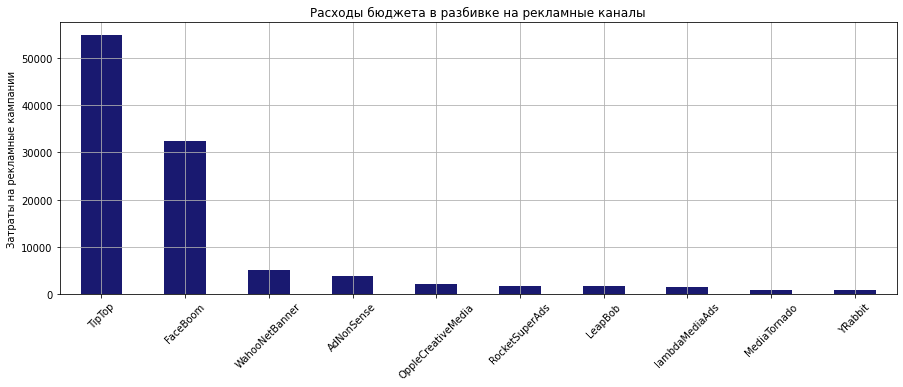

In [39]:
c_temp = costs.pivot_table(index='channel', values='costs', aggfunc='sum').sort_values(by='costs', ascending=False)
display(c_temp.T)
c_temp.plot(
    kind='bar',
    figsize=(15,5),
    grid=True,
    color='#191970',
    xlabel='',
    ylabel='Затраты на рекламные кампании',
    legend=False,
    rot=45
)

plt.title('Расходы бюджета в разбивке на рекламные каналы')
plt.show()

Больше всего трат пришлось на канал TipTop, далее идет канал FaceBoom, который привел больше всего платящих пользователей. На последних местах каналы MediaTornado и YRabbit, с затратами менее 1000.

Для отслеживания динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику построим график.

In [40]:
# Для начала дополним нашу таблицу с затратами столбцами week и month
# Для этого создадим новую переменную costs_wm
costs_wm = costs
costs_wm['week'] = costs_wm['dt'].astype('datetime64[W]')
costs_wm['week'] = costs_wm['week'].dt.isocalendar().week
costs_wm['month'] = costs_wm['dt'].astype('datetime64[M]')
costs_wm['month'] = costs_wm['month'].dt.month
# Проверим корректность извлечения недели и месяца
costs_wm 

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,17,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,42,10
1796,2019-10-24,lambdaMediaAds,6.4,43,10
1797,2019-10-25,lambdaMediaAds,8.8,43,10
1798,2019-10-26,lambdaMediaAds,8.8,43,10


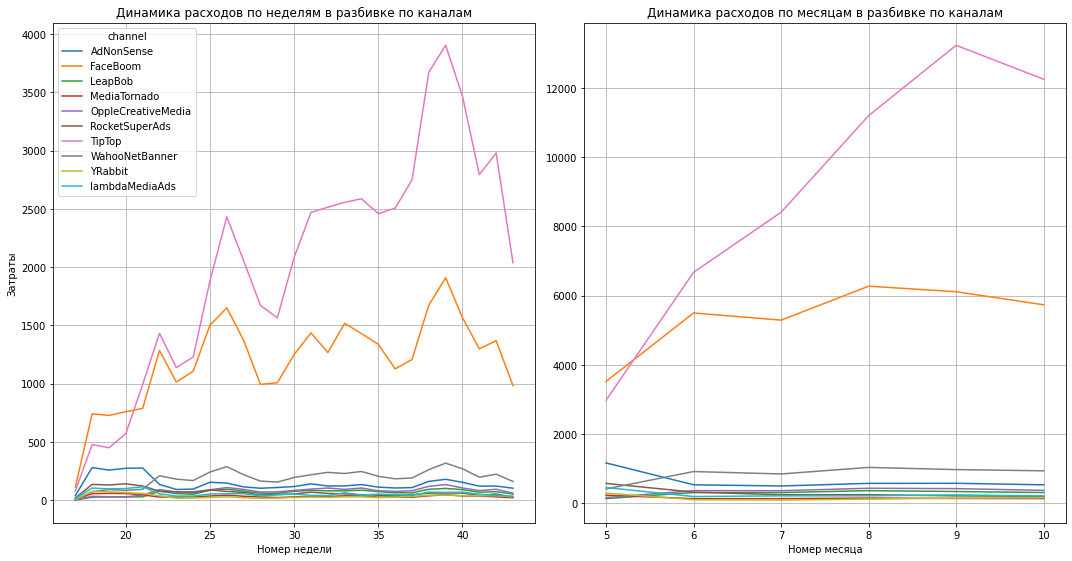

In [41]:
plt.figure(figsize=(15, 15))

ax1 = plt.subplot(2, 2, 1)
costs_wm.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(
    grid=True, ax=ax1
)

plt.xlabel('Номер недели')
plt.ylabel('Затраты')
plt.title('Динамика расходов по неделям в разбивке по каналам')

ax2 = plt.subplot(2, 2, 2,)
costs_wm.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(
    grid=True, ax=ax2, legend=False
)

plt.xlabel('Номер месяца')
plt.title('Динамика расходов по месяцам в разбивке по каналам')
plt.tight_layout()
plt.show() 

Благодаря полученным данным можно отследить динамику затрат на рекламные кампании в разбивке по неделям и месяцам. Пик затрат у многих каналов пришелся на 39 неделю. Если отслеживать динамику по месяцам, то мы видим как сильно выросли затраты на 2 источника привлечения пользователей - TipTop и FaceBoom. Либо у нас проходила крупна\ рекламная кампания ближе к осени, либо из за технической ошибки мы скрутили очень много бюджета.

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Для данного анализа будем использовать профили пользователей.

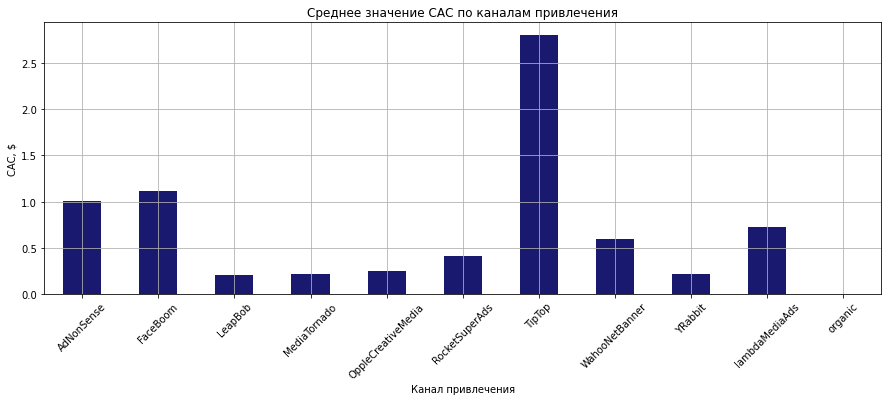

In [42]:
profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean'
).plot(kind='bar', grid=True, figsize=(15, 5), rot=45, legend=False, color='#191970')
plt.ylabel('CAC, $')
plt.xlabel('Канал привлечения')
plt.title('Среднее значение САС по каналам привлечения')
plt.show()

В данном разделе посчитали общую сумму расходов на маркетинг, которая равна 105437$. Определили, как траты были распределены по рекламным источникам и выяснили что больше всего расходов пришлось на канал TipTop. Отследили динамику изменения расходов по неделям и месяцам, в разбивке по каждому источнику, и заметили, что на 39 неделе был пик затрат среди каналов. Нашли среднюю стоимость привлечения одного пользователя в разбивке по каналам, среди которыйх TipTop оказался самым невыгодным.

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Анализ окупаемости рекламы

Предположим, что на календаре 1 ноября 2019 года, и зададим 14 дневный горизон анализа данных. 

Для начала проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

In [43]:
# Для начала зададим необходимые нам параметры
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

In [51]:
# Создадим новую переменную, в которую сохораним данные из датафрейма profiles, исключив органических пользователей
profiles_rk = profiles.query('channel != "organic"')

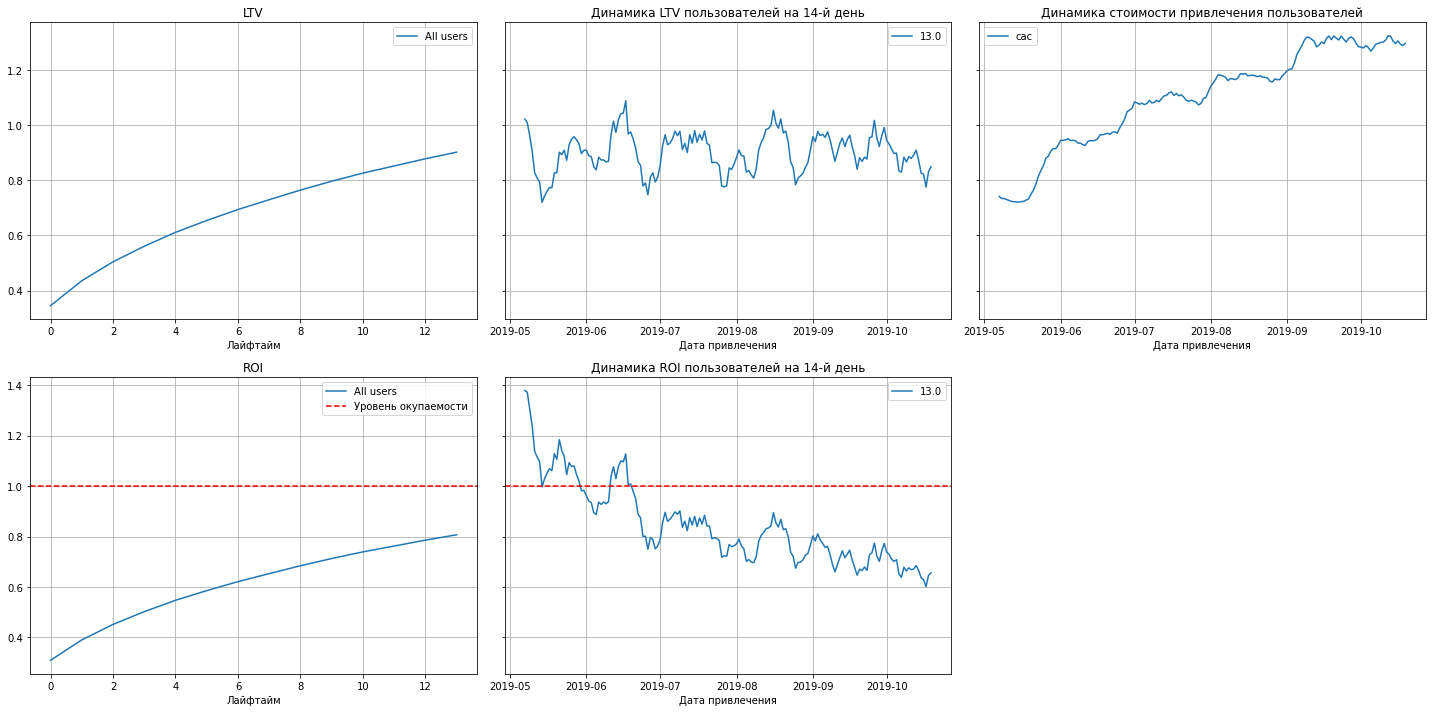

In [55]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_rk, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По полученным графикам можно сделать следующие выводы:
- Реклама не окупается совсем
- CAC увеличивается на протяжении всего рассматриваемого периода, значит на протяжении это времени было увеличение рекламного бюджета
- В связи с увеличение рекламного бюджета после 2019-06 окупаемость пользователей обратно пропорционально упала

Проверим конверсию пользователей и динамику её изменения.

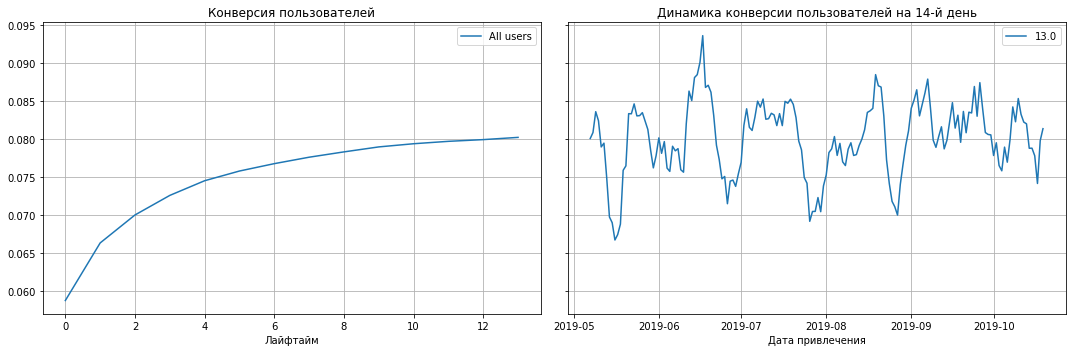

In [56]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_rk, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

По графикам видно, что пользователи конвертируются достаточно хорошо. Динамика конверсии пользователей на 14-й день выше для пользователей, которые пришли после увеличения бюджета на рекламные кампании.

Проверим удержание пользователей и динамику её изменения.

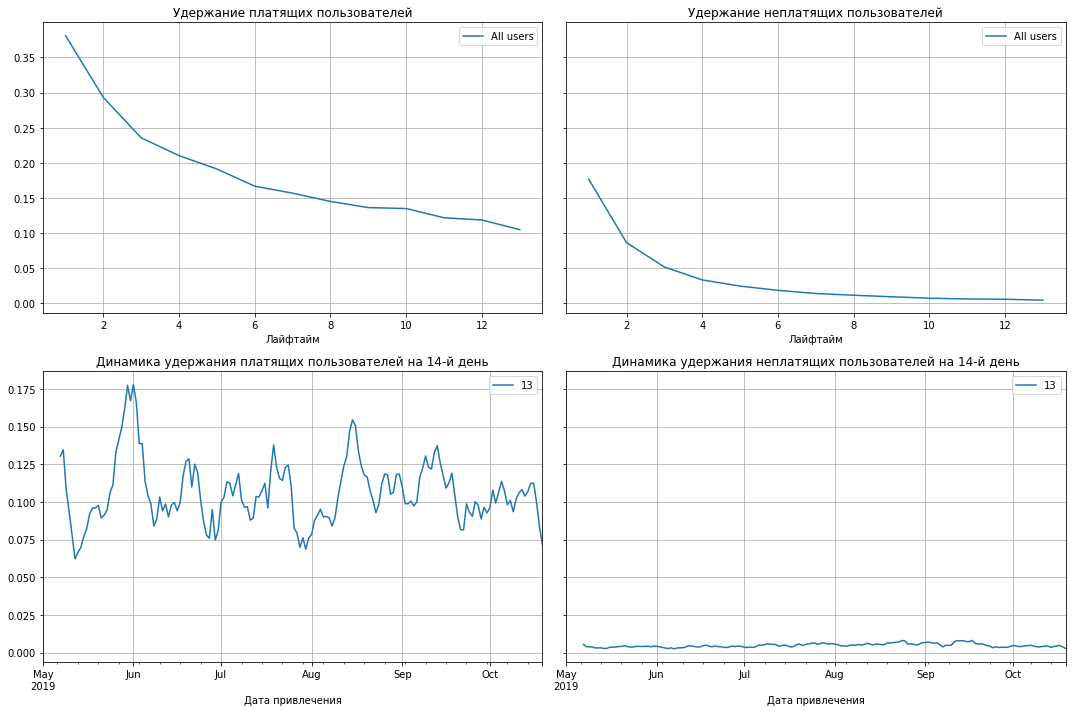

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_rk, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

По графикам видно, что как платящие пользователи, так и неплатящие стабильно плхо удерживаются. Динамика удержания платящих пользователей на 14 дней варьируется от 6% до 18%, что можно считать доволно низким показателем. Необходимо рассомтреть все показатели в разрезе по странам, устройствам или каналам, чтобы понять, что может являться причиной таких низких показателей.

Для начала изучим окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

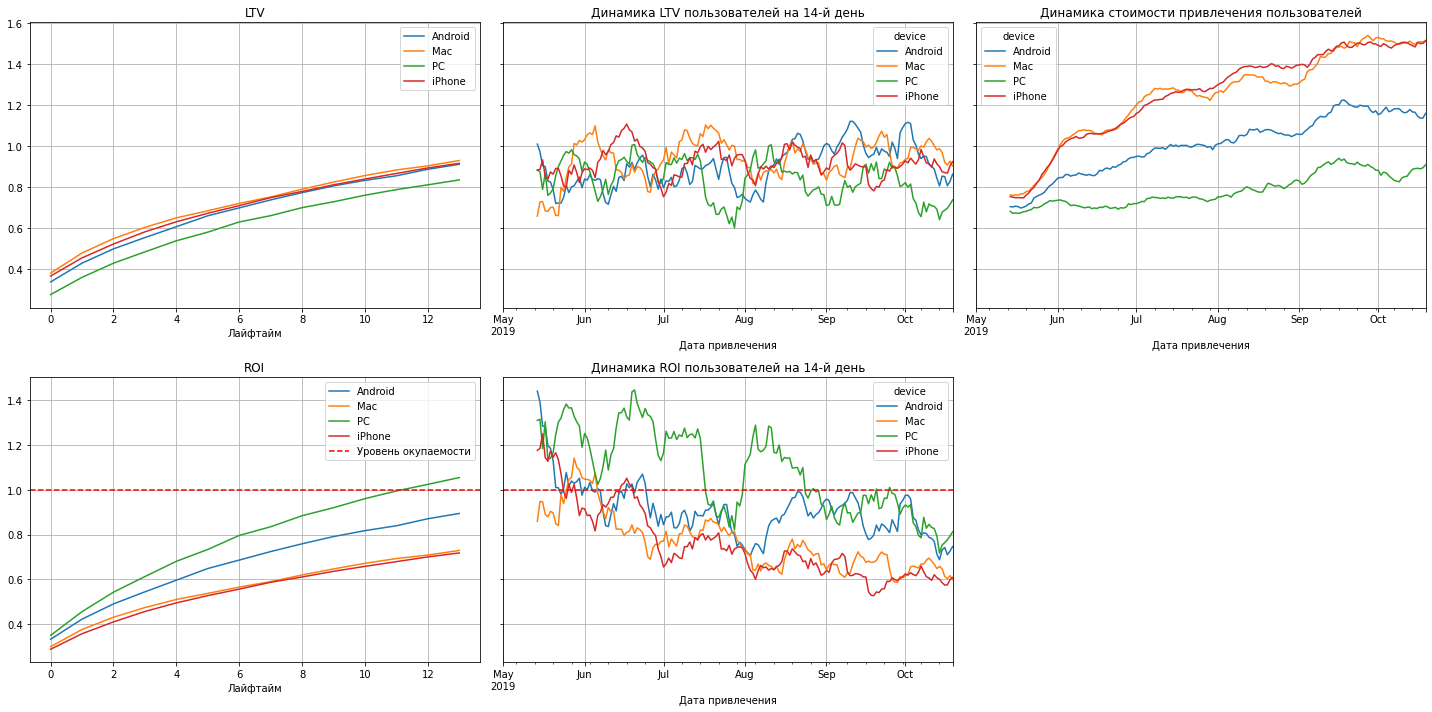

In [58]:
# Передадим параметру dimensions столбец device

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_rk, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам можно сказать следующее:
- Реклама окупается только для пользователей, которые являются владельцами PC. Подозрительно что, у владельцев iPhone и Mac одинаково идет показатель ROI
- Стоимость привлечения владельцев техники Apple выше, чем у остальных.
- Динамика ROI указывает на то, пользователи, которые были привлечены начиная с середины лета, совершенно перестали окупаться, исключение, владельцы PC, которые был привлечены с августа по сентябрь.

Делать выводы рано, но возьмем себе на заметку владельцев iPhone и Mac.

Тепрь изучим окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

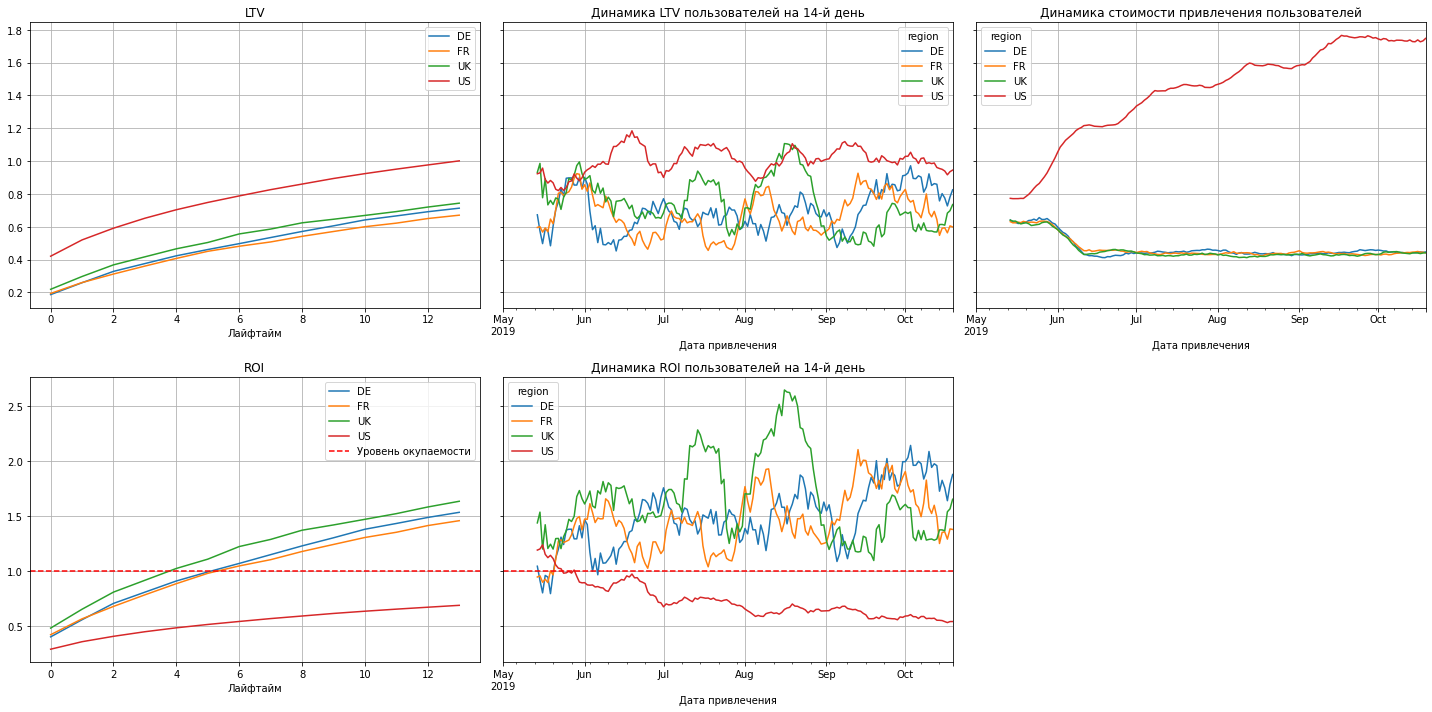

In [59]:
# Передадим параметру dimensions столбец region

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_rk, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Благодаря полученным графикам мы выявили, что пользователи из `US` не окупаются, а пользователи других стран окупаются. При этом сильное падение опять наблюдается ближе к Июлю. При этом LTV из выше чем у пользователей из других стран. Изначально стоимость привлечения данных пользователей выше чем в других странах и растет на всем промежутке рассматриваемого периода.

Для полноты картины посмотрим окупаемость рекламы в разбивке по источникам.

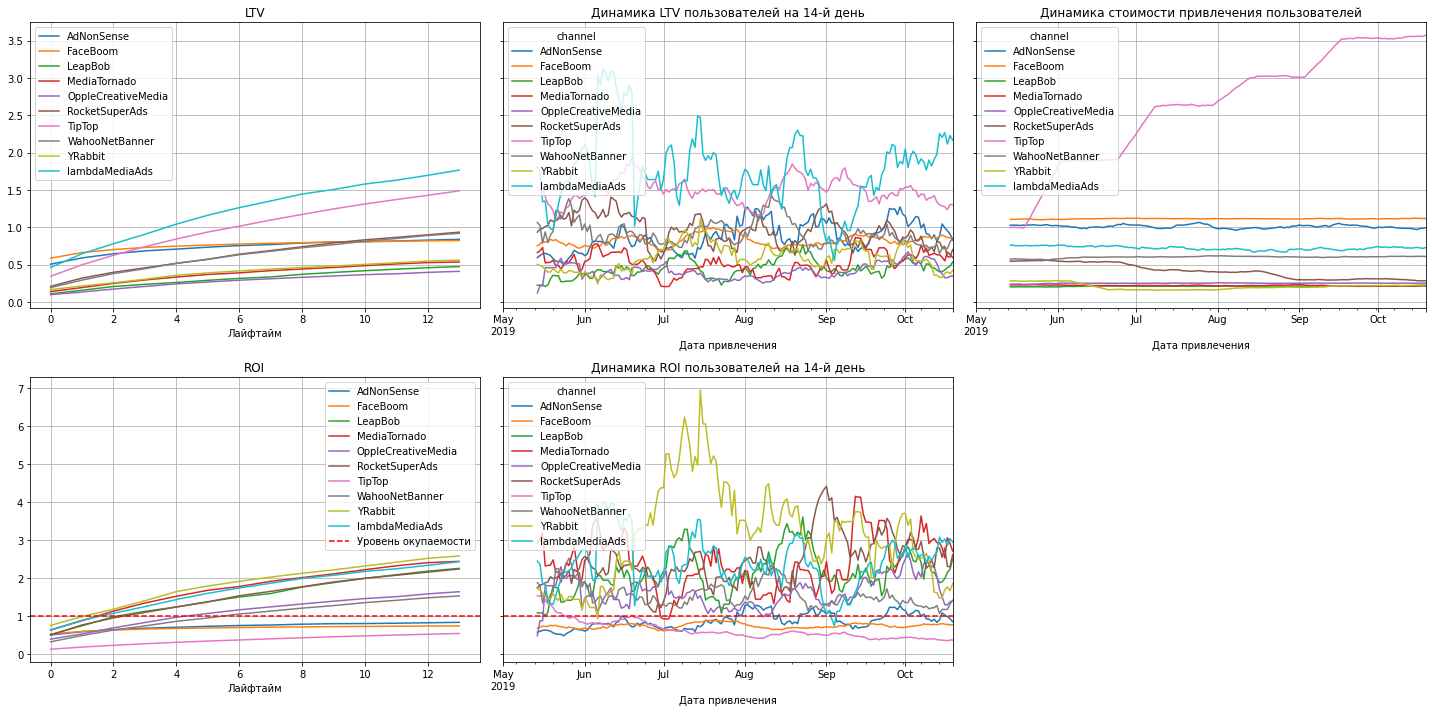

In [60]:
# Передадим параметру dimensions столбец channel

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_rk, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Сразу бросается в глаза стоимость привлечения пользователей через канал TipTop. Исходя из предыдущих результатов мы узнали, что на данный канал был увеличен рекламный бюджет, но ввиду увеличение стоимости привлечения пользователей, этот канал не окупается. Несмотря на это LVT данного канала один из самых высоких. Также вспомним канал FaceBoom, на который приходится 40% платящих пользователей. Данный канал также не окупается, а стоимость привлечения пользователей выше чем у остальных каналов, кроме TipTop. Посчитаем и визуализируем конверсию, а также удеражание в разбивке по каналам.

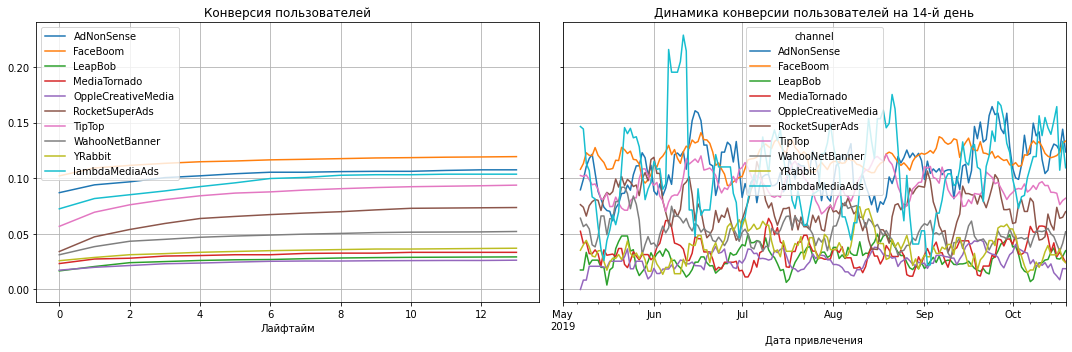

In [61]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_rk, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Пользователи из FaceBoom показывают хорошую конверсию, из TipTop чуть ниже. Взглянем на удержание.

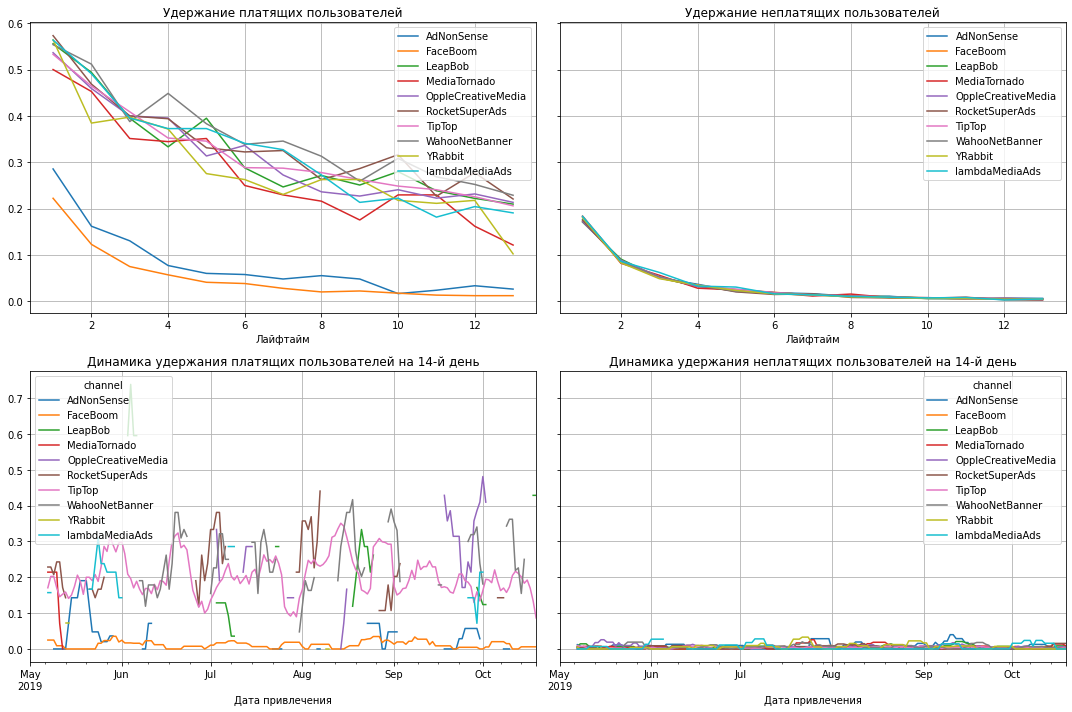

In [63]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_rk, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Пользователи канала FaceBoom стабильно плохо удерживаются, удержние стремится к нулю. Что также влияет на выручку кампании.
Также стоит обратить внимание на канал AdNonSense, с него также приходит некачественный траффик, ввиду того что пользователи стабильно плохо удерживаются.

В целом по полученным результатам можно сделать вывод что рекламная кампания не окупается за 14 день, возможно в долгосрочной перспективе. На окупаемость рекламы негативно влияют пользователи техники Apple и пользователи из США. Также стоит обратить внимание на рекламный канал TipTop, который ввиду имеет самый высокий CAC среди каналов, а также каналы FaceBoom и AdNonSense, которые приводят некачественный траффик. Пользователи этих каналов стабильно плохо удерживаются. Проблемы окупаемости могут быть связаны как с техническими проблемами, так и особенностью рекламного рынка в США. Что касается канала FaceBoom, может некачественный траффик связан с особенностью рекламной кампании, где пользователи покупают что, то в приложении, ради другой более крутой плюшки, напрмер на FaceBoom. В любом случае стоит глубже изучить пробему, но для этого нам не хватает данных, а также пересмортеть сплит бюджета внутри рекламных инструментов и таргетингов по ГЕО. Ну и конечно-же пообщаться с маркетологами и сообщить им о проблемных каналах.

## Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

В данном проекте перед нами стояла задача разобраться в причинах, по которой кампания терпит убытки, несмотря на огромные вложения в рекламу.

Перед началом исследовательского анализа мы выполнили несколько поинтов, чтобы избежать искажения данных, а именно:
- Изучили предоставленные нам данные
- Привели подгруженные датафремы в "порядок", приведя все к единому стилю и нужному типу данных
- проверили датафрейм на наличие пропусков и дубликатов

Для проведения анализа мы подготовили "почву" для дальнейшей работы. Создали необходимые нам функции, с помощью которых мы могли находить и визуализировать такие показатели как: LTV, ROI, CAC, CR и Retention. Также задали дату относительно которой нам предстоит работать и горизонт анализа, который измеряется двумя неделями, согласно бизнес-плану - это тот период времени, за который привлечение новых пользователей должно окупать рекламную кампанию.

Далее мы приступили к исследовательскому анализу данных.  Первоочередно мы составили профили пользователей, соединив в один датафрейм всю информацию о пользователе, а именно:
- id пользователя
- первое посещение пользователя, дата + время
- канал привлечения, откуда пришел пользователь
- устройство пользователя, с которого было совершено первое посещение
- страна пользователя
- дата первого посещения пользователя
- первый день месяца, в котором было первое посещение
- платящий пользователь или нет
- стоимость привлечения данного пользователя

После чего мы нашли количество и долю платящих пользователей в разрезе по странам, устройствам и каналам привлечения. Больше всего платящих пользователей приходится на США, но также важно понимать что на данную страну приходится 66% от общего количества пользователей. Большинство плятящих пользователей совершали своей первый контакт с мобильного устройства, а именно с iPhone. Среди рекламных каналов лидером по привлечению платящих пользователей стал FaceBoom, на который приходиться 40% от общего числа платящих пользователей.

Следующим шагом мы оценили сумарные расходы на рекламные кампании в разбивке по каналам, а также динамику расходов каждого канала в разбивке по неделям и месяцам. Большая часть расходов приходится на канал TipTop, расходы которого превышают 54 000. В динамике мы отследили, что пиком затрат был сентябрь, а именно 39 неделя.

Далее мы приступили с оценке окупаемости рекламы. В целом рекламная кампания на 14 день не окупается, возможно спустя пару дней только. После июня расходы на рекламную кампанию начинают возрастать, а окупаемость пользователей снижаться. В целом по платящии пользователи удерживаются достаточно плохо.

Чтобы выяснить какие факторы могут оказывать негативное влияние на окупаемость рекламы, мы проанализировали окупаемость кампании в разбивке по устройствам, странам и рекламные каналам, и получили следующие результаты:
1. Реклама окупается только для пользователей, которые являются владельцами PC и Android. Подозрительно что, у владельцев iPhone и Mac одинаково идет показатель ROI. Стоимость привлечения владельцев техники Apple выше, чем у остальных. Динамика ROI указывает на то, пользователи, которые были привлечены начиная с середины лета, совершенно перестали окупаться.
2. Пользователи из US не окупаются, а пользователи других стран окупаются. При этом сильное падение опять наблюдается ближе к Июлю. При этом LTV пользователей из США выше, чем у пользователей из других стран. Изначально стоимость привлечения данных пользователей выше чем в других странах и растет на всем промежутке рассматриваемого периода.
3. Канал TipTop имеет самый большой рекламный бюджет, но ввиду увеличение стоимости привлечения пользователей, этот канал не окупается. Несмотря на это LVT данного канала один из самых высоких.
4. Канал FaceBoom, несмотря на самую большую долю платящих пользователей, привлекает некачественный траффик, пользователи которого долго не задерживаются в приложении, следовательно деньги на привлечение уходят в пустую.

На данном этапе, для исправления данной ситуации, можно пересмотреть сплит бюджета среди каналов и настройти таргетингов на гео и устройства пользователей, а именно:
1. Перелоцировать бюджет каналов TipTop, FaceBoom и AdNonSense на более эффективные и окупаемые инструменты.
2. Разбить США по регионам и таргетироваться отдельно на каждый регион, чтобы найти более эффективные.

Точно сказать, что именно влияет на низкую окупаемость кампании возможно только после углубленного анализа, для которого нам, к сожалению, не хватает данных, ввиду того, что это можеть быть как техническая ошибка, так и особенность рекламного рынка.